# Imports:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from typing import Sequence

# Q4.1:

In [6]:
class SimplePercolation:
    """
    the class to simulate 2d percolation and check it with simple method(checking all pathes)
    methods:

    light:
    the function to check a random number and light the squares

    show:
    the function to show the result of the percolation

    check:
    the function to check the percolation with simple method

    checkSquare:
    the function to check a square

    """

    def __init__(self, p: float, length: int) -> None:
        """
        the function to construct the simplePercolation object

        :param p:the input possiblity
        :type p: float
        :param length: the size of the area
        :type length: int
        """
        self.p = p
        self.length = length
        self.map = np.zeros((self.length,self.length))
        self.cmap = self.map.copy()


    def light(self) -> None:
        """
        the function to check a random number and light the squares

        rp is the random param
        """
        rp = np.random.uniform(0.,1.,(self.length,self.length))
        self.map += np.ones((self.length,self.length)) * (rp<self.p)

    def show(self) -> None:
        """
        the function to show the result of the percolation
        """
        plt.imshow(self.map)

    def check(self) -> int:
        """
        the function to check the percolation with simple method

        :return: 1 if the percolation happened, else 0
        :rtype: int
        """
        self.cmap = self.map.copy()
        res = 0
        for i in range(self.length):
            if self.checkSquare(0,i)==1:
                res = 1
                break

        return res

    def checkSquare(self, x: int, y: int) -> int:
        """
        the function to check a square
        first check if the point is in bounds then check the left,right,up and down recursively
        if we reach the end return 1

        :param x: the first coordinate of the point
        :type x:int
        :param y: the second coordinate of the point
        :type y: int
        :return: 1 if the square is at the end else:None
        :rtype: int,None
        """
        if x==-1 or x==self.length or y==-1 or y==self.length:pass
        else:
            if self.cmap[x][y] ==1 :
                if x==self.length-1:
                    return 1
                self.cmap[x][y] = 0
                if self.checkSquare(x-1,y)==1: return 1
                if self.checkSquare(x,y-1)==1: return 1
                if self.checkSquare(x+1,y)==1: return 1
                if self.checkSquare(x,y+1)==1: return 1
            else:
                pass



## Q4.1 main Part:

1

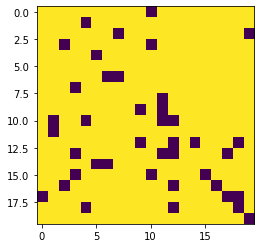

In [7]:
p = SimplePercolation(0.9,20)
p.light()
p.show()
p.check()

# Q4.2:

In [8]:
class ColoringPercolation:
    """
    the class to simulate 2d percolation and check it with coloring method
    methods:

    show:
        the function to show the result of the percolation

    check:
        the function to check the percolation with coloring method

    checkSquare:
        the function to check a square

    getColors:
        the function to get the colors of the points in the input list

    getLightingNeighbors:
        the function to get the lighting neighbors of the point (x,y)

    """
    def __init__(self, p: float, length: int, maxInt: int) -> None:
        """
        the function to construct the coloringPercolation object

        :param p:the possibility param
        :type p:float
        :param length:the size of the area
        :type length:int
        :param maxInt:the color of the last layer
        :type maxInt:int
        """
        self.p = p
        self.length = length
        self.map = np.zeros((self.length,self.length))
        self.color = 2
        self.maxInt = maxInt

    def show(self) -> None:
        """
        the function to show the result of the percolation
        """
        plt.imshow(self.map)

    def check(self) -> int:
        """
        the function to check the percolation with coloring method

        :return:1 if the percolation happened else 0
        :rtype:int
        """
        self.map[0]=1
        self.map[self.length-1] = self.maxInt
        for i in range(1,self.length-1):
            for j in range(self.length):
                self.checkSquare(i,j)
        if any(self.map[self.length-1]==1) :return 1
        else:return 0

    def checkSquare(self, x: int, y: int) -> None:
        """
        the function to check a square

        :param x:the first coordination of the point
        :type x:int
        :param y:the second coordination of the point
        :type y:int
        """
        rand = int(np.random.rand(1)<=self.p)
        if rand == 1:
            self.map[x,y] = self.color
            self.color += 1

            lns = self.getLightingNeighbors(x,y)
            if len(lns)==1:
                self.map[x][y] = self.map[lns[0][0]][lns[0][1]]
            elif len(lns)>1:
                colors = self.getColors(lns)
                colors.append(self.map[x][y])
                minColor = min(colors)
                for c in colors:
                    self.map += (minColor-c)*np.ones((self.length,self.length))*(self.map==c)

    def getColors(self, points: Sequence[Sequence[int]]) -> Sequence[int]:
        """
        the function to get the colors of the points in the input list

        :param points:the input list
        :type points:Sequence[Sequence[int]]
        :return:the list of colors
        :rtype:Sequence[int]
        """
        colors = []
        for point in points:
            colors.append(self.map[point[0]][point[1]])
        return list(set(colors))


    def getLightingNeighbors(self, x: int, y: int) -> Sequence[Sequence[int]]:
        """
        the function to get the lighting neighbors of the point (x,y)
        checking if the neighbors are not out of bounds.

        :param x:the first coordinate of the point
        :type x:int
        :param y:the second coordinate of the point
        :type y:int
        :return:the lighting neighbors
        :rtype:Sequence[Sequence[int]]
        """
        lightingNeighbors = []
        if (x+1)!=self.length:
            if self.map[x+1][y]!=0:
                lightingNeighbors.append((x+1,y))

        if x!=0:
            if self.map[x-1][y]!=0:
                lightingNeighbors.append((x-1,y))

        if (y+1)!=self.length:
            if self.map[x][y+1]!=0:
                lightingNeighbors.append((x,y+1))

        if y!=0:
            if self.map[x][y-1]!=0:
                lightingNeighbors.append((x,y-1))

        return lightingNeighbors




## Q4.2 main Part:

1


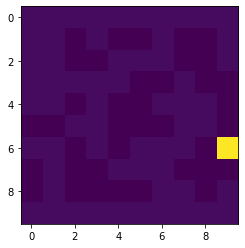

In [11]:
cp = ColoringPercolation(0.5,10,20)
print(cp.check())
cp.show()

# Q4.3:

In [13]:
class HoshenKeoplmanPercolation:
    """
    the class to simulate 2d percolation and check it with Hoshen Keoplman method
    methods:

    show:
        the function to show the result of the percolation

    check:
        the function to check the percolation with coloring method

    checkLeft:
        the function to check bounds ,the left square of the given coordination and return if its value is not 0 and the value

    checkAbove:
        the function to check bounds ,the above square of the given coordination and return if its value is not 0 and the value

    getSolidarityLength:
        the function to get the solitary length of the fractal

    translateMap:
        the function to translate the labels

    checkSquare:
        the function to check a square
    """

    def __init__(self, p: float, length: int) -> None:
        """
        the function to construct the Hoshen Keoplman Percolation object

        initializing the l,s,k and infColor

        :param p:the input possibility
        :type p: float
        :param length: the size of the area
        :type length: int
        """
        self.p = p
        self.length = length
        self.map = np.zeros((self.length,self.length),dtype=int)
        self.l = [0,1,0]
        self.s = [0,self.length,0]
        self.k = 2
        self.infColor = 0


    def show(self) -> None:
        """
        the function to show the result of the percolation
        """
        self.translateMap()
        plt.imshow(self.map)

    def check(self) -> None:
        """
        the function to check the percolation with HoshenKeoplman method
        """
        self.map[0]=1
        for x in range(1,self.length):
            for y in range(self.length):

                self.checkSquare(x,y)

        self.translateMap()
        if any(self.map[self.length-1]==self.map[0]) :
            self.infColor = self.map[0][0]
            return 1
        else:return 0

    def checkSquare(self, x: int, y: int) -> None:
        """
        the function to check a square with HoshenKeoplman algorithm

        :param x: the first coordinate of the square
        :type x: int
        :param y: thg second coordinate of the square
        :type y: int
        """
        rand = int(np.random.rand(1)<self.p)
        if rand == 1:
            if self.checkLeft(x,y)[0]:
                self.map[x][y] = copy.deepcopy(self.checkLeft(x,y)[1])
                self.s[self.checkLeft(x,y)[1]] += 1

                if self.checkAbove(x,y)[0]:
                    if self.checkLeft(x, y)[1] != self.checkAbove(x, y)[1]:
                        self.s[self.checkLeft(x,y)[1]] += copy.deepcopy(self.s[self.checkAbove(x,y)[1]])
                        self.s[self.checkAbove(x,y)[1]] = 0
                        for i in range(len(self.l)):
                            if self.l[i] == self.l[self.checkAbove(x,y)[1]]:
                                self.l[i] = copy.deepcopy(self.l[self.checkLeft(x,y)[1]])

            else:
                if self.checkAbove(x,y)[0]:
                    self.map[x][y] = copy.deepcopy(self.checkAbove(x,y)[1])
                    self.s[self.checkAbove(x,y)[1]] +=1
                else:
                    self.l[self.k]=copy.deepcopy(self.k)
                    self.map[x][y] = copy.deepcopy(self.k)
                    self.s[self.k] += 1
                    self.k +=1
                    self.l.append(0)
                    self.s.append(0)


    def checkLeft(self, x: int, y: int) -> Sequence:
        """
        the function to check bounds ,the left square of the given coordination and return if its value is not 0 and the value

        :param x: the first coordinate of the square
        :type x: int
        :param y: thg second coordinate of the square
        :type y: int
        :return: if its value is not 0 and the value
        :rtype: Sequence
        """
        if x==0 :return False, 0
        else:return self.map[x-1][y]!=0 , self.map[x-1][y]

    def checkAbove(self, x: int, y: int) -> Sequence:
        """
        the function to check bounds ,the above square of the given coordination and return if its value is not 0 and the value

        :param x: the first coordinate of the square
        :type x: int
        :param y: thg second coordinate of the square
        :type y: int
        :return: if its value is not 0 and the value
        :rtype: Sequence
        """
        if y==0 :return False, 0
        else:return self.map[x][y-1]!=0 , self.map[x][y-1]

    def translateMap(self) -> None:
        """
        the function to translate the labels
        """
        for i in range(self.length):
            for j in range(self.length):
                self.map[i][j] = self.l[self.map[i][j]]

    def getSolidarityLength(self) -> float:
        """
        the function to get the solitary length of the the percolation

        removing the inf one from the set,gettng r for each one and returning the mean of them
        """
        hMap = [ [[],[]] ]
        h = list(set(self.l))
        h.remove(self.infColor)

        for i in range(max(h)):
             hMap.append( [[],[]] )

        sum  = 0
        n = 0

        for x in range(self.length):
            for y in range(self.length):
                if self.map[x][y]!=0 and self.map[x][y]!=self.infColor :
                    hMap[self.map[x][y]][0].append(x)
                    hMap[self.map[x][y]][1].append(y)

        for k in hMap:
            if k != [[], []]:
                sum += np.sqrt( np.var(np.array(k[0]))  + np.var(np.array(k[1])))
                n +=1
        if n ==0 : return 0
        else: return sum/n

## Q4.2 main Part:

0


0.589646291183361

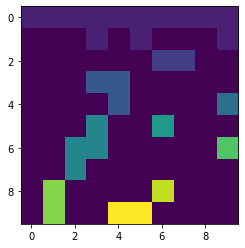

In [14]:
cp = HoshenKeoplmanPercolation(0.25,10)
print(cp.check())
cp.show()
cp.getSolidarityLength()

In [15]:
def getAverageQs(l: int) -> Sequence[float]:
    """
    the function to get average Q for different ps  for 100 iterations

    :param l: the size of area
    :type l: int
    :return: the average qs
    :rtype: Sequence[float]
    """
    averageQs = []
    for i in range(21):
        p = i * 0.05
        qs = []
        for j in range(100):
            cp = HoshenKeoplmanPercolation(p,l)
            qs.append(cp.check())
            del cp
        averageQs.append(np.average(qs))
    return averageQs


In [16]:
#the array for ps
ps   = np.array(range(0,21))/20

In [382]:
averageQ1 = getAverageQs(10)

In [384]:
averageQ2 = getAverageQs(100)

In [385]:
averageQ3 = getAverageQs(200)

#### Plotting the average qs:

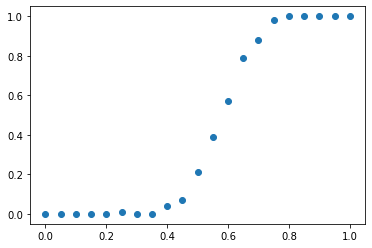

In [383]:
plt.scatter(ps , averageQ1)
plt.show()

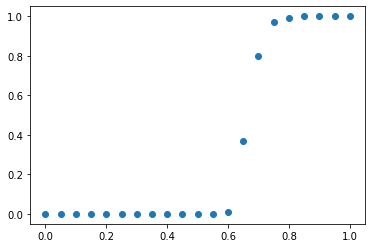

In [386]:
plt.scatter(ps , averageQ2)
plt.show()

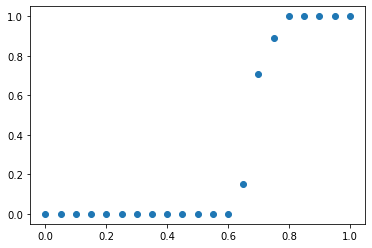

In [387]:
plt.scatter(ps , averageQ3)
plt.show()

# Q4.4:

In [34]:
def getAverageQInfs(l: int) -> Sequence[float]:
    """
    the function to get average Q_inf for different ps  for 100 iterations

    :param l: the size of area
    :type l: int
    :return: the average q_infs
    :rtype: Sequence[float]
    """
    averageQInfs = []
    for i in range(21):
        p = i * 0.05
        qInfs = []
        for j in range(100):
            cp = HoshenKeoplmanPercolation(p,l)
            if cp.check(): qInfs.append(cp.s[1]/(l**2))
            else: qInfs.append(0)
            del cp
        averageQInfs.append(np.average(qInfs))
    return averageQInfs


In [35]:
averageQInfs1 = getAverageQInfs(10)

In [36]:
averageQInfs2 = getAverageQInfs(100)

In [37]:
averageQInfs3 = getAverageQInfs(200)

#### Plotting the  Q_inf  for different sizes

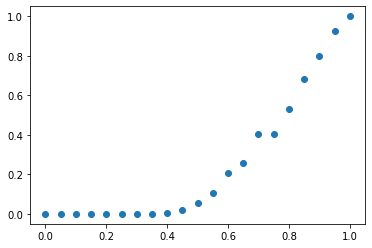

In [38]:
plt.scatter(ps , averageQInfs1)
plt.show()

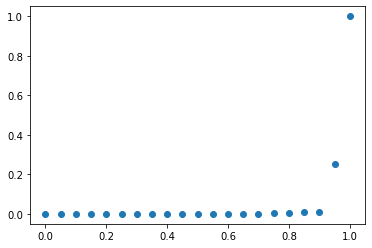

In [39]:
plt.scatter(ps , averageQInfs2)
plt.show()

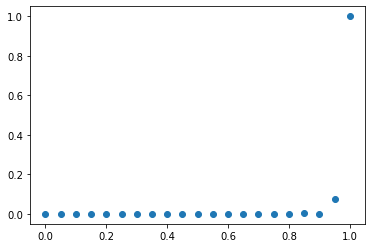

In [40]:
plt.scatter(ps , averageQInfs3)
plt.show()

# Q4.5:

In [41]:
def getAverageSolidaryLengths(l: int) -> Sequence[float]:
    """
    the function to get average SolidaryLengths for different ps for 100 iterations

    :param l: the size of area
    :type l: int
    :return: averageSolidaryLengths
    :rtype: Sequence[float]
    """
    averageSolidaryLengths = []
    for i in range(1,21):
        p = i * 0.05
        sls = []
        for j in range(100):
            cp = HoshenKeoplmanPercolation(p,l)
            cp.check()
            sls.append(cp.getSolidarityLength())
            del cp
        averageSolidaryLengths.append(np.average(sls))
    return averageSolidaryLengths


In [42]:
averageSolidaryLengths1 = getAverageSolidaryLengths(10)

In [43]:
averageSolidaryLengths2 = getAverageSolidaryLengths(20)

In [44]:
averageSolidaryLengths3 = getAverageSolidaryLengths(40)

In [45]:
averageSolidaryLengths4 = getAverageSolidaryLengths(80)

In [46]:
averageSolidaryLengths5 = getAverageSolidaryLengths(160)

#### Plotting the  SolidaryLengths for different sizes

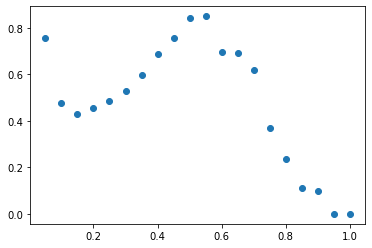

In [47]:
plt.scatter(ps[1:] , averageSolidaryLengths1)
plt.show()

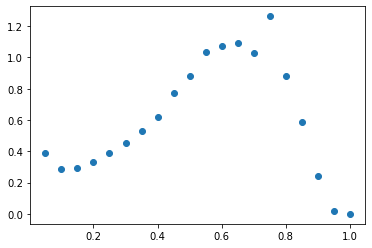

In [48]:
plt.scatter(ps[1:] , averageSolidaryLengths2)
plt.show()

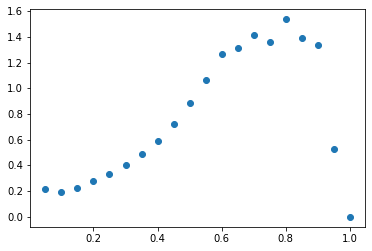

In [49]:
plt.scatter(ps[1:] , averageSolidaryLengths3)
plt.show()

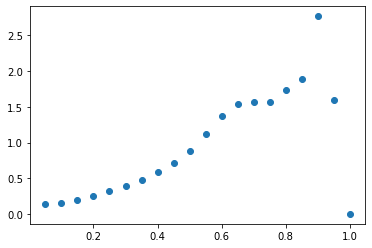

In [50]:
plt.scatter(ps[1:] , averageSolidaryLengths4)
plt.show()

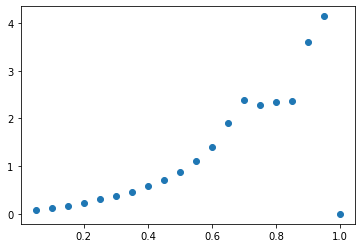

In [51]:
plt.scatter(ps[1:] , averageSolidaryLengths5)
plt.show()

In [52]:
# specifying the first step max of the solitary Lengths
max1 = max(averageSolidaryLengths1)
max2 = max(averageSolidaryLengths2)
max3 = max(averageSolidaryLengths3)
max4 = max(averageSolidaryLengths4)
max5 = max(averageSolidaryLengths5)

In [99]:
p_c1_i = ps[1:][averageSolidaryLengths1.index(max1)]
p_c2_i = ps[1:][averageSolidaryLengths2.index(max2)]
p_c3_i = ps[1:][averageSolidaryLengths3.index(max3)]
p_c4_i = ps[1:][averageSolidaryLengths4.index(max4)]
p_c5_i = ps[1:][averageSolidaryLengths5.index(max5)]

In [53]:
def getAverageSolidaryLengthsCompletion(l: int, max: float) -> Sequence[float]:
    """
    the function to get complete average SolitaryLengths for new different ps for 100 iterations

    :param max: the p with the max first step solitary witch we're setting new points close to it
    :type max: float
    :param l: the size of area
    :type l: int
    :return: averageSolitaryLengths
    :rtype: Sequence[float]
    """
    averageSolidaryLengthsC = []
    for i in range(-2,3):
        p = max+i*0.01
        sls = []
        for j in range(100):
            cp = HoshenKeoplmanPercolation(p,l)
            cp.check()
            sls.append(cp.getSolidarityLength())
            del cp
        averageSolidaryLengthsC.append(np.average(sls))
    return averageSolidaryLengthsC


In [100]:
averageSolidaryLengths1Complete = averageSolidaryLengths1 + getAverageSolidaryLengthsCompletion(10,p_c1_i)

In [101]:
averageSolidaryLengths2Complete = averageSolidaryLengths2 + getAverageSolidaryLengthsCompletion(20,p_c2_i)

In [102]:
averageSolidaryLengths3Complete = averageSolidaryLengths3 + getAverageSolidaryLengthsCompletion(40,p_c3_i)

In [106]:
averageSolidaryLengths4Complete = averageSolidaryLengths4 + getAverageSolidaryLengthsCompletion(80,p_c4_i)

In [107]:
averageSolidaryLengths5Complete = averageSolidaryLengths5 + getAverageSolidaryLengthsCompletion(160,p_c5_i)

In [115]:
ps1 = list(ps[1:]) + list(p_c1_i + np.array([-0.02,-0.01,0.,0.01,0.02]))
ps2 = list(ps[1:]) + list(p_c2_i + np.array([-0.02,-0.01,0.,0.01,0.02]))
ps3 = list(ps[1:]) + list(p_c3_i + np.array([-0.02,-0.01,0.,0.01,0.02]))
ps4 = list(ps[1:]) + list(p_c4_i + np.array([-0.02,-0.01,0.,0.01,0.02]))
ps5 = list(ps[1:]) + list(p_c5_i + np.array([-0.02,-0.01,0.,0.01,0.02]))

#### plotting the complete averageSolitaryLengths:

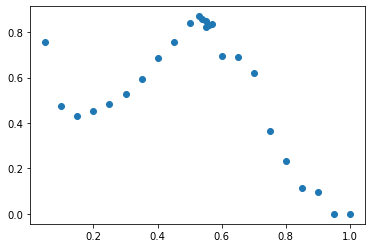

In [122]:
plt.scatter(ps1 , averageSolidaryLengths1Complete)
plt.show()

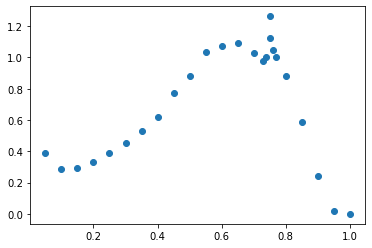

In [123]:
plt.scatter(ps2 , averageSolidaryLengths2Complete)
plt.show()

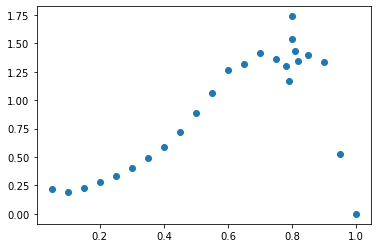

In [124]:
plt.scatter(ps3, averageSolidaryLengths3Complete)
plt.show()

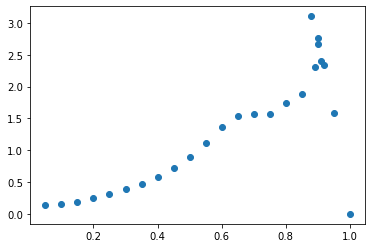

In [125]:
plt.scatter(ps4, averageSolidaryLengths4Complete)
plt.show()

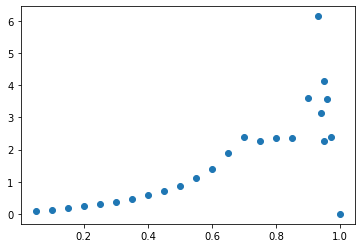

In [126]:
plt.scatter(ps5, averageSolidaryLengths5Complete)
plt.show()

In [127]:
# finding new maximizing ps:
max1final = max(averageSolidaryLengths1Complete)
max2final = max(averageSolidaryLengths2Complete)
max3final = max(averageSolidaryLengths3Complete)
max4final = max(averageSolidaryLengths4Complete)
max5final = max(averageSolidaryLengths5Complete)

In [130]:
p_c1_f = ps1[averageSolidaryLengths1Complete.index(max1final)]
p_c2_f = ps2[averageSolidaryLengths2Complete.index(max2final)]
p_c3_f = ps3[averageSolidaryLengths3Complete.index(max3final)]
p_c4_f = ps4[averageSolidaryLengths4Complete.index(max4final)]
p_c5_f = ps5[averageSolidaryLengths5Complete.index(max5final)]

####  plotting maximizing p_c and lengths:

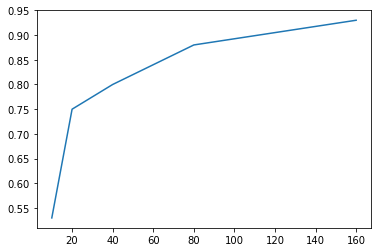

In [170]:
plt.plot([10,20,40,80,160],[p_c1_f,p_c2_f,p_c3_f,p_c4_f,p_c5_f])
plt.show()

# Q4.6:

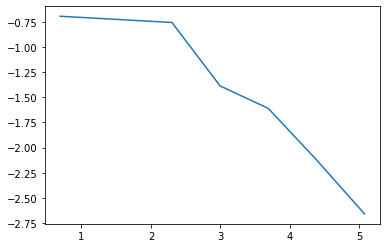

In [195]:
pc_inf = 1
deltaPc = pc_inf - np.array([0.5,p_c1_f,p_c2_f,p_c3_f,p_c4_f,p_c5_f])
logDeltaPc = np.log(deltaPc)
logLs = np.log(np.array([2,10,20,40,80,160]))
plt.plot(logLs,logDeltaPc)

In [196]:
m = np.polyfit(logLs,logDeltaPc,1)[0]
v = -1/m
print("v is : ",v)
print("r2 for logDeltaPc and logLs: ",np.corrcoef(logLs, logDeltaPc)[0][1])

v is :  2.163583431434251
r2 for logDeltaPc and logLs:  -0.9429376198145349


# Q4.7:

In [181]:
class FractalPercolation:
    """
    the class  to simulate the fractal percolation
    methods:
        show:
        the function to show the result of simulation

        light:
        the function to get a random number and fractaly light the squares

        lightSquare:
        the function to ligth the input square

        getSolidarityLength:
        the function to get the solitary length of the fractal

        translate:
        the function to turn blocked squares to 0

    """

    def __init__(self, p: float, length: int) -> None:
        """
        the function to construct the fractal percolation object
        :param p: the input possibility param
        :type p: float
        :param length:the size of the area
        :type length: int
        """
        self.p = p
        self.length = length
        self.map = np.zeros((self.length,self.length))
        self.neighbors = [(0,0)]
        self.count = 0



    def show(self) -> None:
        """
        the function to show the result of simulation
        """
        plt.imshow(self.map)

    def light(self) -> None:
        """
        the function to get a random number and fractaly light the squares
        """
        self.lightSquare(1)
        while len(self.neighbors)>0:
            self.lightSquare(np.random.rand(1)<=self.p)

        self.translate()

    def lightSquare(self, rand: int) -> None:
        """
        the function to ligth the input square
        light if rand == 1 and block if rand == 0
        check if the neighbors are in bounds and unoccupied the add to the neighbors

        :param rand:the rand number(0,1)
        :type rand:int
        """
        x = self.neighbors[0][0]
        y = self.neighbors[0][1]

        if rand:
            self.map[x][y] = 1
            self.count += 1
            self.neighbors.remove(self.neighbors[0])

            if x != 0 and self.map[x - 1][y] ==0 :
                self.neighbors.append((x-1,y))

            if y!=0 and self.map[x][y-1]==0:
                self.neighbors.append((x,y-1))

            if x!=self.length-1 and self.map[x+1][y]==0:
                self.neighbors.append((x+1,y))

            if y!=self.length-1 and self.map[x][y+1]==0:
                self.neighbors.append((x,y+1))


        else:
            self.map[x][y] = -1
            self.neighbors.remove(self.neighbors[0])




    def translate(self) -> None:
        """
        the function to turn blocked squares to 0
        """
        self.map += np.ones((self.length,self.length))*(self.map==-1)

    def getSolidarityLength(self) -> None:
        """
        the function to get the solitary length of the fractal
        """
        xs = []
        ys = []

        for x in range(self.length):
            for y in range(self.length):
                if self.map[x][y]==1 :
                    xs.append(x)
                    ys.append(y)

        return np.sqrt( np.var(np.array(xs))  + np.var(np.array(ys)))

## Q4.7 main part:

8.216214646376935


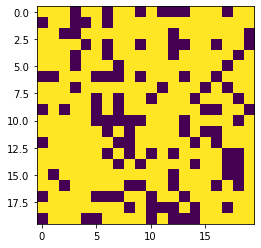

In [197]:
fp = FractalPercolation(0.7,20)
fp.light()
fp.show()
print(fp.getSolidarityLength())

In [ ]:
def getFractalPercolationMeans(p: float, l: int) -> Sequence:
    """
    the function to get average mean size and mean correlation length of the fractal percolation for 100 iterations

    :param p: the input possibility
    :type p: float
    :param l: the size of the area
    :type l: int
    :return: the mean size and the mean correlation length
    :rtype: Sequence
    """
    ss = []
    cls = []
    for i in range(100):
        fp = FractalPercolation(p,l)
        fp.light()
        ss.append(fp.count)
        cls.append(fp.getSolidarityLength())
    return np.mean(ss),np.mean(cls)

In [ ]:
meanSs = []
meanCls = []

for p in [0.5,0.55,0.59]:
    meanSs.append(getFractalPercolationMeans(p,10)[0])
    meanCls.append(getFractalPercolationMeans(p,10)[1])

#### plotting the log of Sizes and the log of the solitary Lengths:

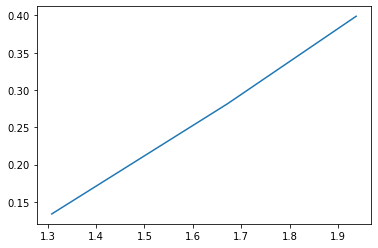

In [198]:
plt.plot(np.log10(meanSs),np.log10(meanCls))
plt.show()